In [1]:
import tensorflow as tf
import numpy as np
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import fit_plot, get_PU_labels


from multilayer_perceptron import MultilayerPerceptron
from pu_learning import ClassDepLossMultilayerPerceptron

In [2]:
# Network Parameters
n_input = 2
n_classes = 2

In [3]:
X, y = datasets.make_classification(n_samples=800, n_features=2, n_redundant=0, n_informative=2, random_state=0)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.5, random_state=42)
Y_train = np.eye(n_classes)[y_train]
print(X_train.shape)
print(Y_train.shape)

(400, 2)
(400, 2)


(1, 2)
('Epoch:', '0001', 'cost=', '0.708374187')


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

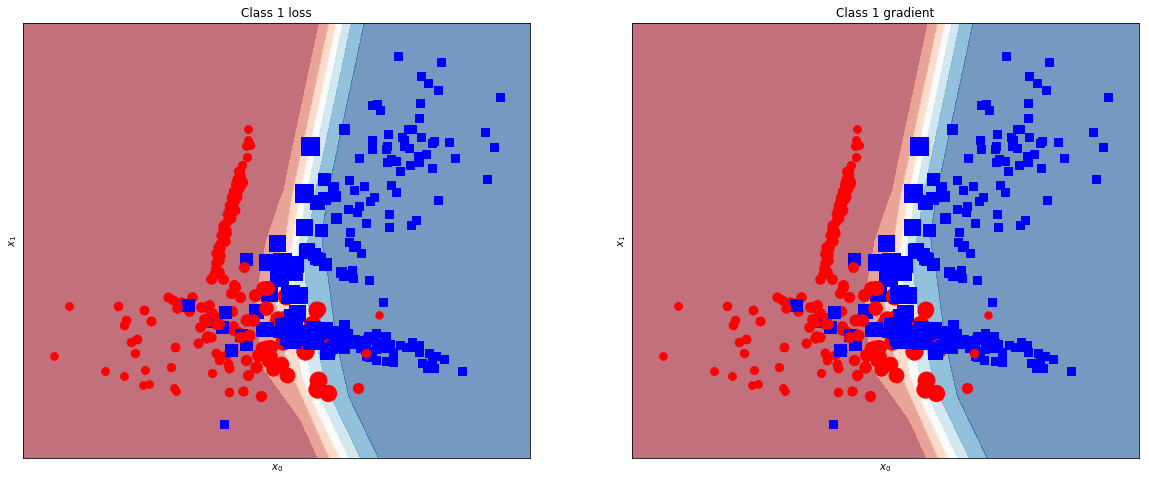

In [7]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=10,
                          verbose=True)
fit_plot(X_train, Y_train, mp, ["loss", "gradient"])

# PU

In [12]:
Y_train_pu = get_PU_labels(Y_train, random_seed=42)

('Using class_weight', array([ 1.        ,  2.82857143]))
('Epoch:', '0001', 'cost=', '0.825678095')
('Epoch:', '0011', 'cost=', '0.790370286')
('Epoch:', '0021', 'cost=', '0.767578483')
('Epoch:', '0031', 'cost=', '0.753825039')
('Epoch:', '0041', 'cost=', '0.744792268')
('Epoch:', '0051', 'cost=', '0.738458470')
('Epoch:', '0061', 'cost=', '0.733713657')
('Epoch:', '0071', 'cost=', '0.730151922')
('Epoch:', '0081', 'cost=', '0.727266237')
('Epoch:', '0091', 'cost=', '0.724747598')
('Using class_weight', array([ 1.        ,  8.00081633]))


<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

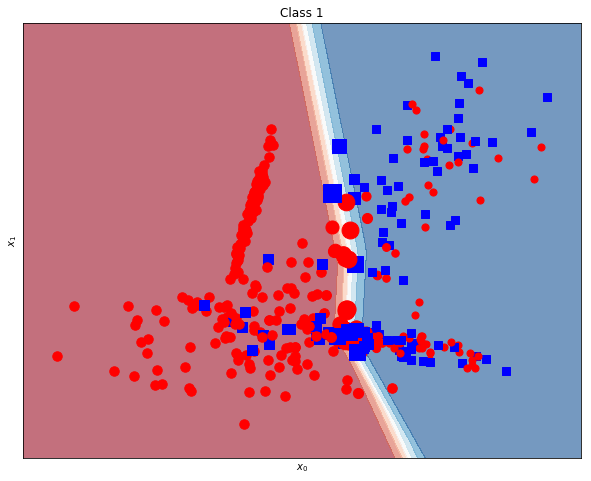

In [13]:
mp = MultilayerPerceptron(n_input=n_input,
                          n_classes=n_classes,
                          n_hiddens=[8, 8],
                          learning_rate=5e-3,
                          regularization=0,
                          training_epochs=100,
                          imbalanced=True,
                          verbose=True)
fit_plot(X_train, Y_train_pu.get(0.5), mp, "gradient")